In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pySIVAK import pySIVAK

In [3]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
import itertools
import json

In [8]:
inputdir = Path(r'../results')
settingsdir = Path('Invoer')
outputdir = Path('Vergelijking_simulaties')

# Set scenario's

In [150]:
with open(settingsdir / 'settings.json') as f:
      settings = json.load(f)
        
with open(settingsdir / 'simulations.json') as f:
      simulations = json.load(f)

In [151]:
all_simulation_names = [name for lock, scenarios in simulations.items() for id,name in scenarios.items()]

In [152]:
# Compute max waiting time, based on scenario-name
maximum_waiting_time = {s: float(s.split(' ')[3]) / 60 if s.startswith("R ") else 9999 for s in all_simulation_names }

# Effect of replications

Simulation is not repeated with latest software

In [13]:
# # Read instances for all runs in dict
# lock = 'Maasbracht'
# scenario = 'SLMSBR KBN 0 - Base, Area 200 Rep'
# name = simulations[lock][scenario]

# summary_file =       inputdir / lock / 'KPI LockChambers Summary' / f'KPI_LockChambers_Summary_Avg ({scenario}).xlsx'
# ships_file =         None
# levelings_file =     inputdir / lock / 'Log Locks Leveling' / f'Log Locks Leveling ({scenario}).xlsx'
# transit_times_file = inputdir / lock / 'Log Locks Transit Times' / f'Log Locks Transit Times ({scenario}).xlsx'

# s = pySIVAK(levelings_file, transit_times_file, ships_file, summary_file)

# s.correction_waitingtimes_without_new_arrivals(maximum_waiting_time=maximum_waiting_time[name])
# s.correction_leveling_without_utilization()
# s.correction_waterloss(water_plane=water_plane[lock], dH=dH[lock], downward_leveling_side=1, correct_ship_volume=False)

# s.name = name

In [51]:
# from copy import deepcopy

In [131]:
# passage_time = {}
# passage_time_sunday = {}
# passage_time_sunday_13h = {}
# for r in np.arange(0, s.replications, 1):  
#     s_repl = deepcopy(s)
#     s_repl.select_replications([r+1])

#     passage_time[r] = s_repl.transit_times['Passage time (hours)'].mean()
#     passage_time_sunday[r] = s_repl.transit_times.loc[s_repl.transit_times['Time'].dt.weekday == 6]['Passage time (hours)'].mean()
#     passage_time_sunday_13h[r] = s_repl.transit_times.loc[(s_repl.transit_times['Time'].dt.weekday == 6) & (s_repl.transit_times['Time'].dt.hour == 13)]['Passage time (hours)'].mean()

In [135]:
# passage_time = pd.Series(passage_time) * 60
# passage_time_norm = (passage_time - passage_time.mean()) / passage_time.std()

# passage_time_sunday = pd.Series(passage_time_sunday) * 60
# passage_time_sunday_norm = (passage_time_sunday - passage_time_sunday.mean()) / passage_time_sunday.std()

# passage_time_sunday_13h = pd.Series(passage_time_sunday_13h) * 60
# passage_time_sunday_13h_norm = (passage_time_sunday_13h - passage_time_sunday_13h.mean()) / passage_time_sunday_13h.std()

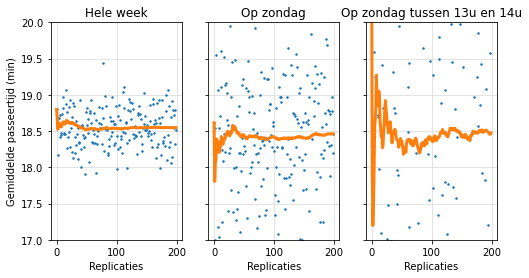

In [213]:
# f, ax = plt.subplots(ncols=3, figsize=(8, 4), sharey=True)
# plt.sca(ax[0])
# passage_time.plot(marker='.', ls='none', markersize=3)
# passage_time.rolling(window=200, min_periods=0).mean().plot(ls='-', lw=3)

# plt.ylabel('Gemiddelde passeertijd (min)')
# plt.title('Hele week')
# plt.grid(c='#ddd')
# plt.xlabel('Replicaties')

# plt.sca(ax[1])
# passage_time_sunday.plot(marker='.', ls='none', markersize=3)
# passage_time_sunday.rolling(window=200, min_periods=0).mean().plot(ls='-', lw=3)

# plt.title('Op zondag')
# plt.grid(c='#ddd')
# plt.xlabel('Replicaties')

# plt.sca(ax[2])
# passage_time_sunday_13h.plot(marker='.', ls='none', markersize=3)
# passage_time_sunday_13h.rolling(window=200, min_periods=0).mean().plot(ls='-', lw=3)

# plt.title('Op zondag tussen 13u en 14u')
# plt.grid(c='#ddd')
# plt.xlabel('Replicaties')

# plt.ylim(17, 20)

# plt.savefig(    outputdir / f'Replicaties.png', bbox_inches='tight', dpi=150)
# plt.savefig(    outputdir / f'Replicaties.svg', bbox_inches='tight')


In [14]:
# f, ax = plt.subplots(ncols=3, figsize=(8, 5), sharey=True)
# plt.sca(ax[0])
# passage_time_norm.plot(marker='.', ls='none', markersize=3)
# passage_time_norm.rolling(window=200, min_periods=0).mean().plot(ls='-', lw=2)

# plt.ylabel('Genormaliseerde gemiddelde passeertijd')
# plt.title('Hele week')
# plt.grid(c='#ddd')
# plt.annotate(f'std: {passage_time.std():.2f} min', (0.95, 0.97), xycoords='axes fraction', ha='right', va='top', bbox= dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9))
# plt.xlabel('Replicaties')
# plt.sca(ax[1])
# passage_time_sunday_norm.plot(marker='.', ls='none', markersize=3)
# passage_time_sunday_norm.rolling(window=200, min_periods=0).mean().plot(ls='-', lw=2)

# plt.title('Op zondag')
# plt.grid(c='#ddd')
# plt.annotate(f'std: {passage_time_sunday.std():.2f} min', (0.95, 0.97), xycoords='axes fraction', ha='right', va='top', bbox= dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9))
# plt.xlabel('Replicaties')

# plt.sca(ax[2])
# passage_time_sunday_13h_norm.plot(marker='.', ls='none', markersize=3)
# passage_time_sunday_13h_norm.rolling(window=200, min_periods=0).mean().plot(ls='-', lw=2)

# plt.title('Op zondag tussen 13u en 14u')
# plt.grid(c='#ddd')
# plt.annotate(f'std: {passage_time_sunday_13h.std():.2f} min', (0.95, 0.97), xycoords='axes fraction', ha='right', va='top', bbox= dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9))
# plt.xlabel('Replicaties')
# plt.ylim(-1, 1)


# plt.savefig(    outputdir / f'Replicaties_norm.png', bbox_inches='tight', dpi=150)
# plt.savefig(    outputdir / f'Replicaties_norm.svg', bbox_inches='tight')


# Aanpassingen vloot

In [157]:
# Read instances for all runs in dict
lock = 'Maasbracht'
scenario_names = ['REF', 'Beroepsvaart +10%', 'Beroepsvaart +20%', 'Recreatievaart -50%','Recreatievaart -100%',]
S = {}
for name in scenario_names:
    
    scenario = {v:k for k,v in simulations[lock].items()}[name]
    
    summary_file =       inputdir / lock / 'KPI LockChambers Summary' / f'KPI_LockChambers_Summary_Avg ({scenario}).csv'
    ships_file =         inputdir / lock / 'Log Generated Ships' / f'Log Generated Ships ({scenario}).csv'
    levelings_file =     inputdir / lock / 'Log Locks Leveling' / f'Log Locks Leveling ({scenario}).csv'
    transit_times_file = inputdir / lock / 'Log Locks Transit Times' / f'Log Locks Transit Times ({scenario}).csv'

    s = pySIVAK(levelings_file, transit_times_file, ships_file, summary_file)

    s.correction_waitingtimes_without_new_arrivals(maximum_waiting_time=maximum_waiting_time[name])
    s.correction_leveling_without_utilization()
    s.correction_waterloss(water_plane=settings['water_plane'][lock], dH=settings['dH'][lock], downward_leveling_side=1, correct_ship_volume=False)

    s.name = name
    
    S[name] = s

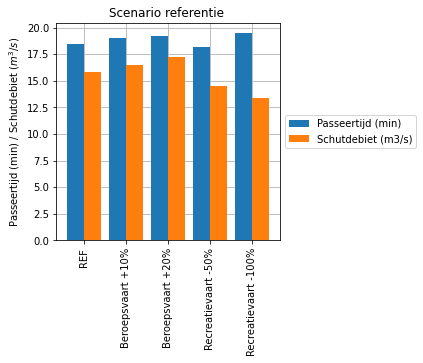

In [158]:
T = {n:s.transit_times['Passage time [hours]'].mean() * 60 for n,s in S.items()}
W = {n:s.waterloss_per_hour_per_day().mean().mean() for n,s in S.items()}

D = pd.DataFrame({'Passeertijd (min)': T, 'Schutdebiet (m3/s)': W})

D.plot.bar(width=0.8, zorder=3, figsize=(4,4))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
# plt.gca().invert_yaxis()
plt.ylabel('Passeertijd (min) / Schutdebiet ($m^3/s$)')
plt.title('Scenario referentie ')

plt.savefig(    outputdir / f'Vloot.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / f'Vloot.svg', bbox_inches='tight')
D.to_csv(       outputdir / f'Vloot.csv')

## Idem voor regime

In [153]:
# Read instances for all runs in dict
lock = 'Maasbracht'
scenario_names = ['R 40 80 30', 'R 40 80 30 Beroepsvaart +10%', 'R 40 80 30 Beroepsvaart +20%', 'R 40 80 30 Recreatievaart -50%','R 40 80 30 Recreatievaart -100%',]
S = {}
for name in scenario_names:
    
    scenario = {v:k for k,v in simulations[lock].items()}[name]
    
    summary_file =       inputdir / lock / 'KPI LockChambers Summary' / f'KPI_LockChambers_Summary_Avg ({scenario}).csv'
    ships_file =         inputdir / lock / 'Log Generated Ships' / f'Log Generated Ships ({scenario}).csv'
    levelings_file =     inputdir / lock / 'Log Locks Leveling' / f'Log Locks Leveling ({scenario}).csv'
    transit_times_file = inputdir / lock / 'Log Locks Transit Times' / f'Log Locks Transit Times ({scenario}).csv'

    s = pySIVAK(levelings_file, transit_times_file, ships_file, summary_file)

    s.correction_waitingtimes_without_new_arrivals(maximum_waiting_time=maximum_waiting_time[name])
    s.correction_leveling_without_utilization()
    s.correction_waterloss(water_plane=settings['water_plane'][lock], dH=settings['dH'][lock], downward_leveling_side=1, correct_ship_volume=False)

    s.name = name
    
    S[name] = s

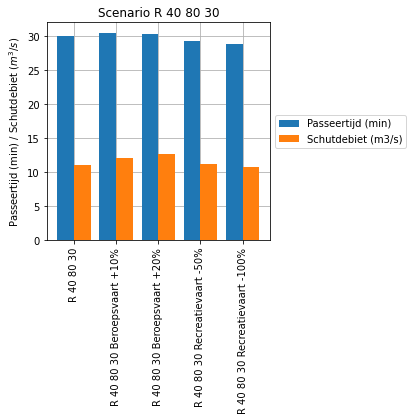

In [156]:
T = {n:s.transit_times['Passage time [hours]'].mean() * 60 for n,s in S.items()}
W = {n:s.waterloss_per_hour_per_day().mean().mean() for n,s in S.items()}

D = pd.DataFrame({'Passeertijd (min)': T, 'Schutdebiet (m3/s)': W})

D.plot.bar(width=0.8, zorder=3, figsize=(4,4))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
# plt.gca().invert_yaxis()
plt.ylabel('Passeertijd (min) / Schutdebiet ($m^3/s$)')
plt.title('Scenario R 40 80 30')

plt.savefig(    outputdir / f'Vloot_R 40 80 30.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / f'Vloot_R 40 80 30.svg', bbox_inches='tight')
D.to_csv(       outputdir / f'Vloot_R 40 80 30.csv')

### Effect regimes 

In [163]:
# Read instances for all runs in dict
lock = 'Maasbracht'
scenario_names = ['REF', 'R 40 80 30', 'R 40 80 60', 'R 60 80 90']
S = {}
for name in scenario_names:
    
    scenario = {v:k for k,v in simulations[lock].items()}[name]
    
    summary_file =       inputdir / lock / 'KPI LockChambers Summary' / f'KPI_LockChambers_Summary_Avg ({scenario}).csv'
    ships_file =         inputdir / lock / 'Log Generated Ships' / f'Log Generated Ships ({scenario}).csv'
    levelings_file =     inputdir / lock / 'Log Locks Leveling' / f'Log Locks Leveling ({scenario}).csv'
    transit_times_file = inputdir / lock / 'Log Locks Transit Times' / f'Log Locks Transit Times ({scenario}).csv'

    s = pySIVAK(levelings_file, transit_times_file, ships_file, summary_file)

    s.correction_waitingtimes_without_new_arrivals(maximum_waiting_time=maximum_waiting_time[name])
    s.correction_leveling_without_utilization()
    s.correction_waterloss(water_plane=settings['water_plane'][lock], dH=settings['dH'][lock], downward_leveling_side=1, correct_ship_volume=False)

    s.name = name
    
    S[name] = s

In [43]:
T = {n:s.transit_times.groupby('Class')['Passage time [hours]'].mean() * 60 for n,s in S.items()}
T = pd.DataFrame(T)

In [44]:
def diff(df):
    # Adjusted to minimise at 0 and still compute the + correct
    df2 = df.copy()
    for c1, c2 in zip(df.columns[1:], df.columns[:-1]):
        df2[c1] = df[c1] - df2.cumsum(axis=1)[c2]
        df2.loc[df2[c1] < 0.00, c1] = 0
    return df2 

plotdata = diff(T)

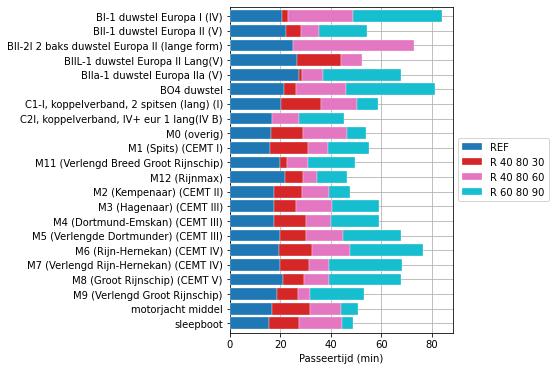

In [47]:
plotdata.plot.barh(figsize=(4, 6), zorder=3, stacked=True, edgecolor='w',
                           linewidth=0.3, width=0.8, colormap='tab10')
plt.xlabel('Passeertijd (min)')
plt.ylabel('')
plt.grid()
plt.gca().invert_yaxis()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig(    outputdir / f'Schutregime_passeertijd.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / f'Schutregime_passeertijd.svg', bbox_inches='tight')
T.to_csv(       outputdir / f'Schutregime_passeertijd.csv')

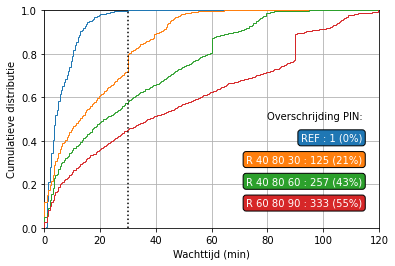

In [81]:
y_annot = 0.40

for ii, (name, s) in enumerate(S.items()):
    plotdata = s.transit_times['Total waiting time [hours]']
    plotdata = plotdata * 60

    t_criterium = 30

    plotdata.plot.hist(density=True, cumulative=True, bins=np.linspace(0, 120, 241), zorder=3, label=name, histtype='step')
    
    

    n_above_criterium = (plotdata > t_criterium).sum() / s.replications
    n_above_criterium_percentage = n_above_criterium / (plotdata.count() / s.replications)
    plt.annotate(f'{name} : {n_above_criterium:.0f} ({n_above_criterium_percentage:.0%})', (0.95, y_annot),
                 xycoords='axes fraction', ha='right', c='white', bbox=dict(boxstyle="round, pad=0.3", fc=f"C{ii}", ec="k", lw=1))
    
    y_annot -= 0.10
plt.annotate(f'Overschrijding PIN:', (0.95, 0.5),
             xycoords='axes fraction', ha='right', c='k')
plt.xlabel('Wachttijd (min)')
plt.axvline(t_criterium, c='k', ls=':', zorder=4)
plt.grid()
plt.ylabel('Cumulatieve distributie')
plt.xlim(right=plotdata.max())
plt.ylim(0, 1)
plt.autoscale(axis='x', tight=True)


plt.savefig(    outputdir / f'Overschrijding_PIN_wachttijd.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / f'Overschrijding_PIN_wachttijd.svg', bbox_inches='tight')

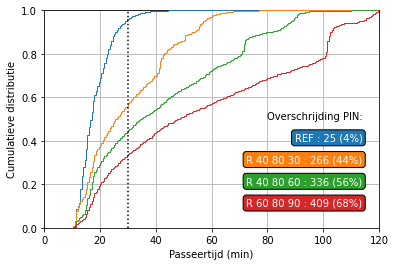

In [82]:
y_annot = 0.40

for ii, (name, s) in enumerate(S.items()):
    plotdata = s.transit_times['Passage time [hours]']
    plotdata = plotdata * 60

    t_criterium = 30

    plotdata.plot.hist(density=True, cumulative=True, bins=np.linspace(0, 120, 241), zorder=3, label=name, histtype='step')
    
    

    n_above_criterium = (plotdata > t_criterium).sum() / s.replications
    n_above_criterium_percentage = n_above_criterium / (plotdata.count() / s.replications)
    plt.annotate(f'{name} : {n_above_criterium:.0f} ({n_above_criterium_percentage:.0%})', (0.95, y_annot),
                 xycoords='axes fraction', ha='right', c='white', bbox=dict(boxstyle="round, pad=0.3", fc=f"C{ii}", ec="k", lw=1))
    
    y_annot -= 0.10
plt.annotate(f'Overschrijding PIN:', (0.95, 0.5),
             xycoords='axes fraction', ha='right', c='k')
plt.xlabel('Passeertijd (min)')
plt.axvline(t_criterium, c='k', ls=':', zorder=4)
plt.grid()
plt.ylabel('Cumulatieve distributie')
plt.xlim(right=plotdata.max())
plt.ylim(0, 1)
plt.autoscale(axis='x', tight=True)


plt.savefig(    outputdir / f'Overschrijding_PIN_passeertijd.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / f'Overschrijding_PIN_passeertijd.svg', bbox_inches='tight')

In [165]:
S['REF']

# Effect daggemiddelde

In [34]:
# Read instances for all runs in dict
locks = ['Born', 'Maasbracht', 'Heel']
# name = 'R 60 80 90'
# name = 'REF'
name = 'R 40 80 30'

S = {}

for lock in locks:
    scenario = {v:k for k,v in simulations[lock].items()}[name]


    summary_file =       inputdir / lock / 'KPI LockChambers Summary' / f'KPI_LockChambers_Summary_Avg ({scenario}).csv'
    ships_file =         inputdir / lock / 'Log Generated Ships' / f'Log Generated Ships ({scenario}).csv'
    levelings_file =     inputdir / lock / 'Log Locks Leveling' / f'Log Locks Leveling ({scenario}).csv'
    transit_times_file = inputdir / lock / 'Log Locks Transit Times' / f'Log Locks Transit Times ({scenario}).csv'

    s = pySIVAK(levelings_file, transit_times_file, ships_file, summary_file)

    s.correction_waitingtimes_without_new_arrivals(maximum_waiting_time=maximum_waiting_time[name])
    s.correction_leveling_without_utilization()
    s.correction_waterloss(water_plane=settings['water_plane'][lock], dH=settings['dH'][lock], downward_leveling_side=1, correct_ship_volume=False)
    S[lock] = s

In [35]:
kwetsbaarheid = {
    'Born': 0.06,  # cm / (m3/s * uur)
    'Maasbracht': 0.24,  # cm / (m3/s * uur)
    'Heel': 0.04  # cm / (m3/s * uur)
}

In [379]:
# def plot_waterstandsvariatie(lock):
#     Q = S[lock].waterloss_per_hour_per_day()
#     Q_daymean = Q.mean()

#     Q_deviation = Q.subtract(Q_daymean)
#     Q_deviation_cumsum = Q_deviation.cumsum(axis=0)

#     Q_deviation_cumsum.loc[24] = None

#     Q_deviation_cumsum = Q_deviation_cumsum.shift(1)
#     Q_deviation_cumsum.loc[0] = 0
    
#     waterstandsvariatie = (Q_deviation_cumsum * kwetsbaarheid[lock])
#     waterstandsvariatie.plot()
#     plt.grid(c='#DDD')
#     plt.ylabel('Waterstandsvariatie (cm)')
#     plt.title('Waterstandsvariatie bij daggemiddelde waterbeschikbaarheid')
#     plt.xlabel('Uur van de dag')
#     plt.legend(['Maandag','Dinsdag','Woensdag', 'Donderdag', 'Vrijdag', 'Zaterdag', 'Zondag'])
#     plt.autoscale(tight=True, axis='x')
#     return waterstandsvariatie

# for lock in locks:
#     plot_waterstandsvariatie(lock)

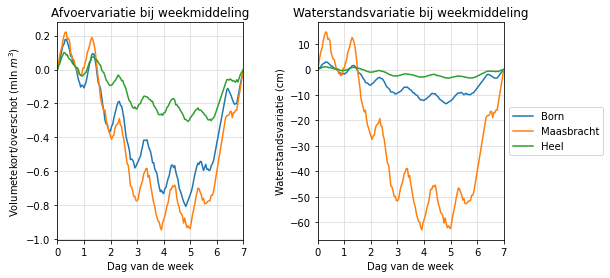

In [36]:
f, ax = plt.subplots(ncols=2, figsize=(8,4))
plt.subplots_adjust(wspace=0.4)
for lock in locks:
    Q = S[lock].waterloss_per_hour_per_day()
    Q_flatten = Q.stack().swaplevel().sort_index()
    Q_flatten.index = c
    Q_weekmean = Q_flatten.mean()

    Q_deviation = Q_flatten.subtract(Q_weekmean)
    Q_deviation_cumsum = Q_deviation.cumsum(axis=0)

    Q_deviation_cumsum.loc[7] = 0

    Q_deviation_cumsum = Q_deviation_cumsum.shift(1)
    Q_deviation_cumsum.loc[0] = 0
    
    (- Q_deviation_cumsum * 60 * 60 / 1e6).plot(ax=ax[0], label=lock, )

    waterstandsvariatie = (- Q_deviation_cumsum * kwetsbaarheid[lock])
    waterstandsvariatie.plot(label=lock, ax=ax[1])


plt.sca(ax[0])
plt.grid(c='#DDD')
plt.ylabel('Volumetekort/overschot (mln $m^3$)')
plt.title('Afvoervariatie bij weekmiddeling')
plt.xlabel('Dag van de week')
plt.autoscale(tight=True, axis='x')
plt.xticks(ticks=np.arange(0, 7.1, 1))    
    
plt.sca(ax[1])
plt.grid(c='#DDD')
plt.ylabel('Waterstandsvariatie (cm)')
plt.title('Waterstandsvariatie bij weekmiddeling')
plt.xlabel('Dag van de week')
plt.autoscale(tight=True, axis='x')
plt.legend(bbox_to_anchor=(1, 0.5), loc='center left')
plt.xticks(ticks=np.arange(0, 7.1, 1))    

plt.savefig(    outputdir / f'Afvoer- en waterstandsvariatie bij weekmiddeling_{name}.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / f'Afvoer- en waterstandsvariatie bij weekmiddeling_{name}.svg', bbox_inches='tight')

# Hevelend schutten

In [99]:
# Read instances for all runs in dict
lock = 'Maasbracht'
scenario_names = ["REF",
"REF H 100 100",
"R 40 80 30",
"R 40 80 30 H 100 100",
"R 40 80 60",
"R 40 80 60 H 100 100"]
S = {}
for name in scenario_names:
    
    scenario = {v:k for k,v in simulations[lock].items()}[name]
    
    summary_file =       inputdir / lock / 'KPI LockChambers Summary' / f'KPI_LockChambers_Summary_Avg ({scenario}).csv'
    ships_file =         inputdir / lock / 'Log Generated Ships' / f'Log Generated Ships ({scenario}).csv'
    levelings_file =     inputdir / lock / 'Log Locks Leveling' / f'Log Locks Leveling ({scenario}).csv'
    transit_times_file = inputdir / lock / 'Log Locks Transit Times' / f'Log Locks Transit Times ({scenario}).csv'

    s = pySIVAK(levelings_file, transit_times_file, ships_file, summary_file)

    s.correction_waitingtimes_without_new_arrivals(maximum_waiting_time=maximum_waiting_time[name])
    s.correction_leveling_without_utilization()
    s.correction_waterloss(water_plane=settings['water_plane'][lock], dH=settings['dH'][lock], downward_leveling_side=1, correct_ship_volume=False)

    s.name = name
    
    S[name] = s

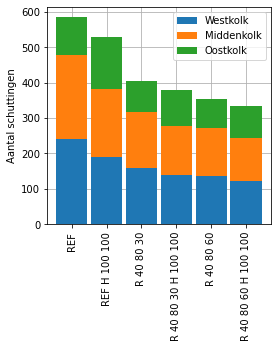

In [148]:
levelings_per_kolk = {scenario: S[scenario].levelings.groupby('Lock Chamber')['Nb of Ships'].count() / S[scenario].replications for scenario in scenario_names}

plotdata = pd.concat(levelings_per_kolk, axis=1).T
plotdata = plotdata[['Westkolk', 'Middenkolk', 'Oostkolk']]
plotdata.columns.name = ''

plotdata.plot.bar(stacked=True, width=0.9, zorder=3, figsize=(4,4))

plt.ylabel('Aantal schuttingen')
plt.grid()

# Conclusies --> minder schuttingen door hevelen?? maar meer door de Oostkolk

plt.savefig(    outputdir / f'Hevelend_aantal_schuttingen.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / f'Hevelend_aantal_schuttingen.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / f'Hevelend_aantal_schuttingen.csv')

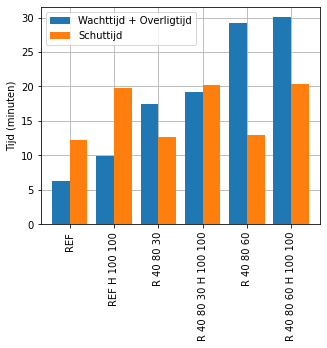

In [147]:
tijd_per_schip = {scenario: S[scenario].transit_times[['Total waiting time [hours]', 'Leveling time [hours]']].mean() * 60 for scenario in scenario_names}

plotdata = pd.concat(tijd_per_schip, axis=1).T
plotdata.rename(columns={
    'Total waiting time [hours]': 'Wachttijd + Overligtijd',
    'Leveling time [hours]': 'Schuttijd'
}, inplace=True)

plotdata.plot.bar(stacked=False, width=0.8, zorder=3, figsize=(5,4))

plt.ylabel('Tijd (minuten)')
plt.grid()
# Conclusies --> nauwelijks effect op wachttijd+overligtijd??


plt.savefig(    outputdir / f'Hevelend_tijd.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / f'Hevelend_tijd.svg', bbox_inches='tight')
plotdata.to_csv(outputdir / f'Hevelend_tijd.csv')

## Buiten dienst

In [159]:
# Read instances for all runs in dict
lock = 'Maasbracht'
scenario_names = ['REF', 'Oostkolk gestremd', 'Westkolk gestremd']
S = {}
for name in scenario_names:
    
    scenario = {v:k for k,v in simulations[lock].items()}[name]
    
    summary_file =       inputdir / lock / 'KPI LockChambers Summary' / f'KPI_LockChambers_Summary_Avg ({scenario}).csv'
    ships_file =         inputdir / lock / 'Log Generated Ships' / f'Log Generated Ships ({scenario}).csv'
    levelings_file =     inputdir / lock / 'Log Locks Leveling' / f'Log Locks Leveling ({scenario}).csv'
    transit_times_file = inputdir / lock / 'Log Locks Transit Times' / f'Log Locks Transit Times ({scenario}).csv'

    s = pySIVAK(levelings_file, transit_times_file, ships_file, summary_file)

    s.correction_waitingtimes_without_new_arrivals(maximum_waiting_time=maximum_waiting_time[name])
    s.correction_leveling_without_utilization()
    s.correction_waterloss(water_plane=settings['water_plane'][lock], dH=settings['dH'][lock], downward_leveling_side=1, correct_ship_volume=False)

    s.name = name
    
    S[name] = s

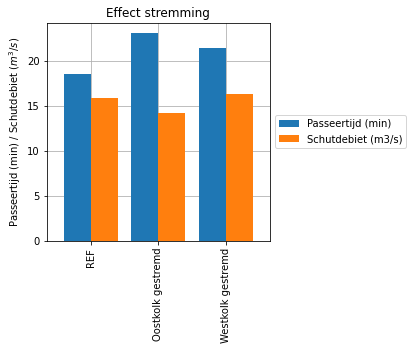

In [161]:
T = {n:s.transit_times['Passage time [hours]'].mean() * 60 for n,s in S.items()}
W = {n:s.waterloss_per_hour_per_day().mean().mean() for n,s in S.items()}

D = pd.DataFrame({'Passeertijd (min)': T, 'Schutdebiet (m3/s)': W})

D.plot.bar(width=0.8, zorder=3, figsize=(4,4))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
# plt.gca().invert_yaxis()
plt.ylabel('Passeertijd (min) / Schutdebiet ($m^3/s$)')
plt.title('Effect stremming')

plt.savefig(    outputdir / f'Stremming.png', bbox_inches='tight', dpi=150)
plt.savefig(    outputdir / f'Stremming.svg', bbox_inches='tight')
D.to_csv(       outputdir / f'Stremming.csv')